In [ ]:
%load_ext autoreload
%autoreload 2
import handlers as main

In [2]:
main.sns_reset()
main.sns_paper_style()
main.set_latex()

In [3]:
ROOT = '../data'
COUNTRIES = ['Sierra Leone','Uganda']
YEARS = {'Sierra Leone':[2016,2019], 'Uganda':[2016,2018]}
RESULTS = 'results'
PLOTS = 'main-plots'

# Load data summaries

In [4]:
df_rs = main.get_residuals(root=ROOT, countries=COUNTRIES, output=RESULTS)
df_dr = main.get_performance_from_predictions(df_rs=df_rs, output=RESULTS)
df_gt = main.get_ground_truth(root=ROOT, countries=COUNTRIES, output=RESULTS)

# Methods

In [5]:
metric = 'nrmse'

## Ablation study

The lower the better
main-plots/baselines_nrmse.pdf saved!


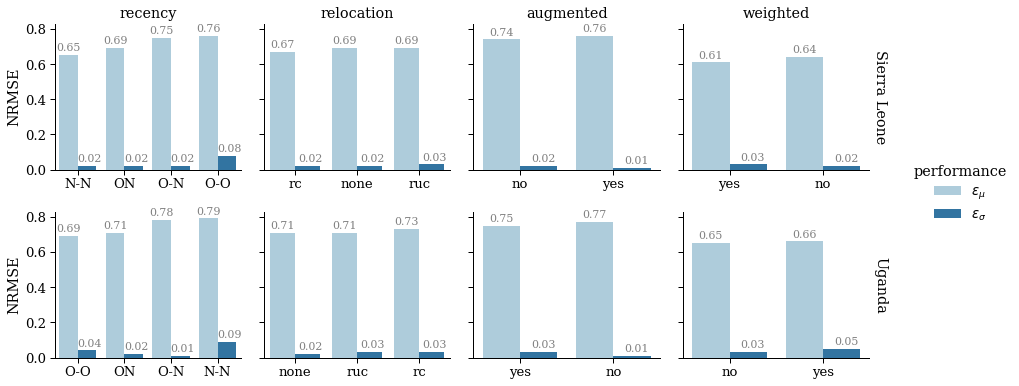

In [6]:
only_best = True
df_ba = main.get_summary_performance(df_dr, metric=metric, only_best=only_best, output=RESULTS)
main.plot_summary_performance(df_ba, output=PLOTS)

# Performance

## Models and data sources

In [7]:
main.tbl_performance_by_model_and_datasource(df_dr, metric='nrmse', output=RESULTS, overall=False)

,,,,,,,,nrmse_mean_SL,nrmse_std_SL,nrmse_mean_UG,nrmse_std_UG
model,De,Mo,Po,Nl,An,In,Im,,,,
CB,y,y,y,y,y,y,-,0.460753,0.814525,0.464267,0.829484
CB$_w$,y,y,y,y,y,y,-,0.437330,0.777961,0.472728,0.847035
CNN,-,-,-,-,-,-,y,0.569621,0.901742,0.599464,0.935568
CNN$_a$,-,-,-,-,-,-,y,0.593339,0.936040,0.594764,0.913297
CNN$_a$+CB,y,y,y,y,y,y,y,0.460587,0.816064,0.465592,0.832935
CNN$_a$+CB$_w$,y,y,y,y,y,y,y,0.454814,0.793805,0.469130,0.846530
CNN+CB,y,y,y,y,y,y,y,0.450422,0.821203,0.509452,0.857019
CNN+CB$_w$,y,y,y,y,y,y,y,0.449374,0.799461,0.518655,0.864155
CB$_w$,y,-,-,-,-,-,-,0.733820,0.936778,0.768138,0.972923


## Intersectionality

In [8]:
var = 'mean'
n_classes = 5
class_type = 'quantiles'
evaluation = 'rmse' # this is not the same as metric
main.tbl_intersectionality(df_rs, df_gt, n_classes=n_classes, class_type=class_type, var=var, evaluation=evaluation, output=RESULTS)


Q1_SL      Q2_SL     Q3_SL      Q4_SL  \
settlement model                                                      
rural      CB              5.484334   3.178774  5.767603  10.455613   
           CB$_w$          7.642611   4.826515  5.183896  10.184434   
           CNN             7.718435   4.481068  4.674896  10.586058   
           CNN$_a$         8.962358   5.067710  4.801022  10.296463   
           CNN+CB          6.237148   3.489633  4.775703   9.812694   
           CNN+CB$_w$      6.234241   3.663061  4.748085   9.743196   
           CNN$_a$+CB      6.741971   3.376283  5.034315  10.548469   
           CNN$_a$+CB$_w$  6.545802   3.453127  5.018556  10.535494   
urban      CB                     -  18.071925  8.131697   6.175419   
           CB$_w$                 -  10.297725  8.158900   8.673102   
           CNN                    -   4.537812  2.829877  11.026990   
           CNN$_a$                -   6.770683  2.213214  10.957215   
           CNN+CB                 -  15.476452  4.733096   6.696706   
           CNN+CB$_w$             -  14.145666  6.526865   6.774238   
           CNN$_a$+CB             -  16.166504  6.838266   5.824007   
           CNN$_a$+CB$_w$         -  15.992785  8.063084   5.750646   

                               Q5_SL      Q1_UG     Q2_UG      Q3_UG  \
settlement model                                                       
rural      CB              23.203967   7.010149  4.063789   3.633276   
           CB$_w$          22.471017   8.826093  5.082800   5.060550   
           CNN             22.555835   9.835480  5.509773   4.868056   
           CNN$_a$         23.408833   9.656825  5.114393   4.606937   
           CNN+CB          20.178360   7.204940  4.491667   4.258716   
           CNN+CB$_w$      21.358870   7.665572  4.507037   4.223044   
           CNN$_a$+CB      22.644579   6.670463  4.257143   3.352022   
           CNN$_a$+CB$_w$  22.109401   6.870751  4.152325   3.594574   
urban      CB               9.690289   6.418710  6.959100  10.079220   
           CB$_w$          11.343098  11.699620  7.383039  12.194780   
           CNN             12.843923   9.769695  5.409654  11.947005   
           CNN$_a$         13.229325  10.114608  5.102072  13.944514   
           CNN+CB           9.618380   9.018018  5.985470  10.631491   
           CNN+CB$_w$       9.334664   8.664764  7.133266  10.960580   
           CNN$_a$+CB       9.479850  10.452470  5.772780  10.028684   
           CNN$_a$+CB$_w$   9.313770   8.864798  6.544141   9.864984   

                              Q4_UG      Q5_UG  
settlement model                                
rural      CB              8.044983  12.536187  
           CB$_w$          8.470682  15.484669  
           CNN             7.547941  16.467982  
           CNN$_a$         7.437432  16.720600  
           CNN+CB          7.665718  15.065498  
           CNN+CB$_w$      7.593775  15.066699  
           CNN$_a$+CB      7.542849  13.775491  
           CNN$_a$+CB$_w$  7.590411  13.837909  
urban      CB              6.765332   9.330380  
           CB$_w$          9.683238  12.833807  
           CNN             7.770634  13.375885  
           CNN$_a$         8.342513  13.184056  
           CNN+CB          7.713862  10.965015  
           CNN+CB$_w$      8.127228  11.079958  
           CNN$_a$+CB      6.672432   9.673955  
           CNN$_a$+CB$_w$  6.723120   9.704272

## Variability

[INFO] Sierra Leone Q-0: 4.24
[INFO] Sierra Leone Q-1: 13.15
[INFO] Sierra Leone Q-2: 17.31
[INFO] Sierra Leone Q-3: 25.01
[INFO] Sierra Leone Q-4: 39.76
[INFO] Sierra Leone Q-5: 72.67
[INFO] Uganda Q-0: 2.01
[INFO] Uganda Q-1: 14.08
[INFO] Uganda Q-2: 17.91
[INFO] Uganda Q-3: 22.39
[INFO] Uganda Q-4: 34.17
[INFO] Uganda Q-5: 82.87
Goodness-of-fit (deg=2): rmse=2.02, r2=0.39 | Sierra Leone - ground-truth - rural
Goodness-of-fit (deg=2): rmse=3.11, r2=0.19 | Sierra Leone - ground-truth - urban
Goodness-of-fit (deg=2): rmse=0.38, r2=0.86 | Sierra Leone - prediction - rural
Goodness-of-fit (deg=2): rmse=0.96, r2=0.72 | Sierra Leone - prediction - urban
Goodness-of-fit (deg=2): rmse=1.91, r2=0.62 | Uganda - ground-truth - rural
Goodness-of-fit (deg=2): rmse=2.97, r2=0.17 | Uganda - ground-truth - urban
Goodness-of-fit (deg=2): rmse=0.55, r2=0.90 | Uganda - prediction - rural
Goodness-of-fit (deg=2): rmse=1.31, r2=0.53 | Uganda - prediction - urban
main-plots/mean_vs_std.pdf saved!


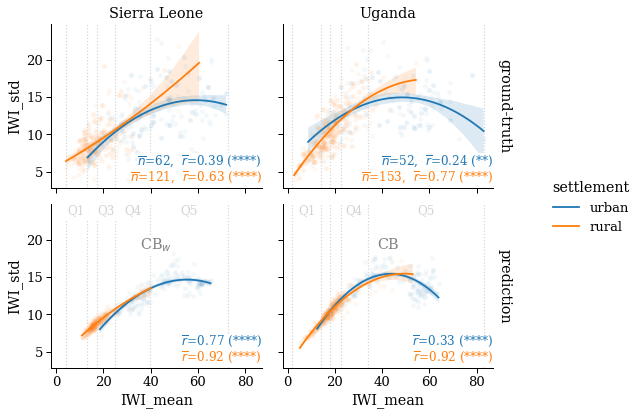

In [9]:
main.plot_variability(df_rs, df_gt, output=PLOTS)

## Model transferability across countries

main-plots/cross_country_performance_nrmse.pdf saved!


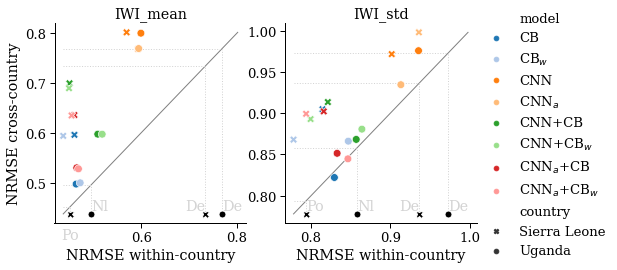

In [10]:
main.plot_cross_country_performance(df_dr, metric=metric, results=RESULTS, overall=False, output=PLOTS)

# High-resolution poverty maps

main-plots/hr_poverty_map_SL_CBw.pdf saved!


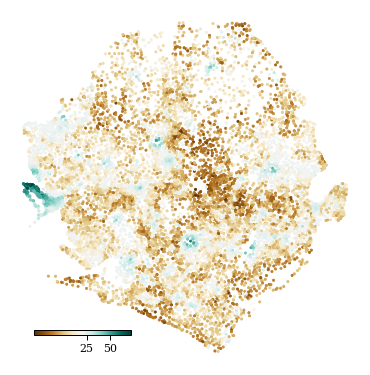

In [11]:
main.plot_poverty_map(ccode='SL',model='CBw',output=PLOTS)

main-plots/hr_poverty_map_UG_CB.pdf saved!


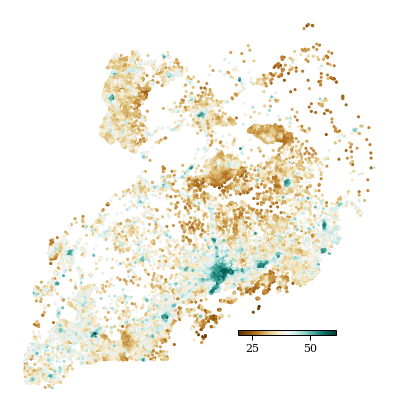

In [12]:
main.plot_poverty_map(ccode='UG',model='CB',output=PLOTS)

main-plots/pplaces_mean_vs_std.pdf saved!


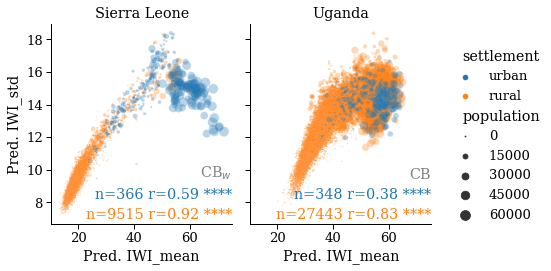

In [13]:
main.plot_pplace_mean_std(query={'SL':'CBw', 'UG':'CB'}, output=PLOTS)